In [36]:
import numpy as np 
import pandas as pd 

In [38]:
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import altair as alt
import re

In [ ]:
!pip install seaborn

In [ ]:
!pip install altair


In [41]:
df_train = pd.read_csv('spotify_history.csv')

In [42]:
df_train.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [43]:
df_train.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [44]:
print(df_train.isnull().sum())

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64


In [45]:
columns_to_replace = ['reason_start','reason_end']
 
# Replace NaN values with "Data Not Available"
df_train[columns_to_replace] = df_train[columns_to_replace].fillna("Data Not Available")

In [46]:
print(df_train.isnull().sum())

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64


In [47]:
for i,col in enumerate(['platform','track_name','artist_name','album_name','reason_start','reason_end']):
    print(col, ':', df_train[col].unique(), '\n') 

platform : ['web player' 'windows' 'android' 'iOS' 'cast to device' 'mac'] 

track_name : ['Say It, Just Say It' 'Drinking from the Bottle (feat. Tinie Tempah)'
 'Born To Die' ... 'Oo-De-Lally - From "Robin Hood"' 'King Of The Road'
 'Chug-A-Lug'] 

artist_name : ["The Mowgli's" 'Calvin Harris' 'Lana Del Rey' ... 'Rudy Snow'
 'Ultra Band' 'Jesse Welles'] 

album_name : ['Waiting For The Dawn' '18 Months' 'Born To Die - The Paradise Edition'
 ... 'Patchwork' 'Oo-De-Lally' 'King Of The Road'] 

reason_start : ['autoplay' 'clickrow' 'trackdone' 'nextbtn' 'backbtn' 'unknown' 'popup'
 'appload' 'fwdbtn' 'trackerror' 'Data Not Available' 'remote' 'endplay'
 'playbtn'] 

reason_end : ['clickrow' 'unknown' 'nextbtn' 'trackdone' 'backbtn' 'reload' 'popup'
 'endplay' 'fwdbtn' 'appload' 'Data Not Available'
 'unexpected-exit-while-paused' 'unexpected-exit' 'logout' 'remote'
 'trackerror'] 



In [48]:
def count_unique_values_cat_cols(df, cat_cols):
 

  unique_value_counts = {}
  for col in cat_cols:
    unique_value_counts[col] = df[col].nunique() 
  return unique_value_counts



def remove_special_chars_all_columns(df):
 

  df_clean = df.copy() 

  for col in df_clean.columns:
    if pd.api.types.is_string_dtype(df_clean[col]):
      df_clean[col] = df_clean[col].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True) 

  return df_clean



def find_special_characters(df, column_name):
 

  all_special_chars = set()
  for album_name in df[column_name]:
    if isinstance(album_name, str):
      special_chars = re.findall(r'[^a-zA-Z0-9\s]', album_name)
      all_special_chars.update(special_chars)

  print("Unique special characters found in the '{}' column:".format(column_name))
  print(sorted(list(all_special_chars)))

def plot_histograms_cat_cols(df, cat_cols):
 

 

  num_cols = len(cat_cols)
  fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 6)) 

  for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=90, labelsize=12) 

  plt.tight_layout()
  plt.show()


def create_donut_charts_for_3_cat_cols(df, cat_cols):
 

  for col in cat_cols:
    value_counts = df[col].value_counts()
    top_categories = value_counts.index[:10]
    top_df = pd.DataFrame({'Category': top_categories, 'Count': value_counts[top_categories]})

    
    plt.figure(figsize=(6, 6))
    plt.pie(top_df['Count'], labels=top_df['Category'], autopct='%1.1f%%', startangle=140, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'Top 10 Categories in {col}')
    plt.show()

def select_tracks_by_reason_end(df):
 

  df_actual_top = df[df['reason_end'] == 'trackdone'][['track_name', 'artist_name', 'album_name']]
  return df_actual_top


def create_top10_tables(df, columns):
 

  for col in columns:
    value_counts = df[col].value_counts()[:10]

    top_df = pd.DataFrame({'Category': value_counts.index, 'Count': value_counts.values})

    top_df['Rank'] = top_df['Count'].rank(method='dense', ascending=False).astype(int)

    # Display the table
    print(f"\nTop 10 Categories in {col}:\n")
    print(top_df[['Rank', 'Category', 'Count']])
    print("-" * 30)

In [49]:
cat_cols = ['platform','track_name','artist_name','album_name','reason_start','reason_end']
unique_value_counts = count_unique_values_cat_cols(df_train, cat_cols)

print("Number of unique values in each categorical column:")
for col, count in unique_value_counts.items():
  print(f"{col}: {count}")

Number of unique values in each categorical column:
platform: 6
track_name: 13839
artist_name: 4113
album_name: 7948
reason_start: 14
reason_end: 16


In [50]:
df = remove_special_chars_all_columns(df_train)

In [51]:
find_special_characters(df, 'album_name')

Unique special characters found in the 'album_name' column:
[]


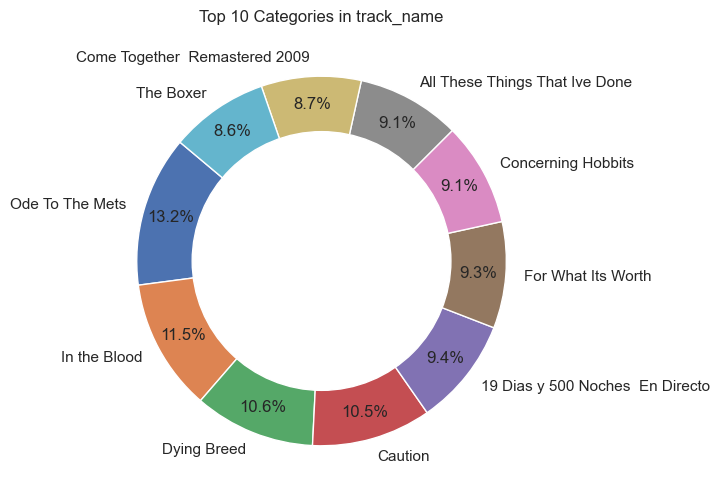

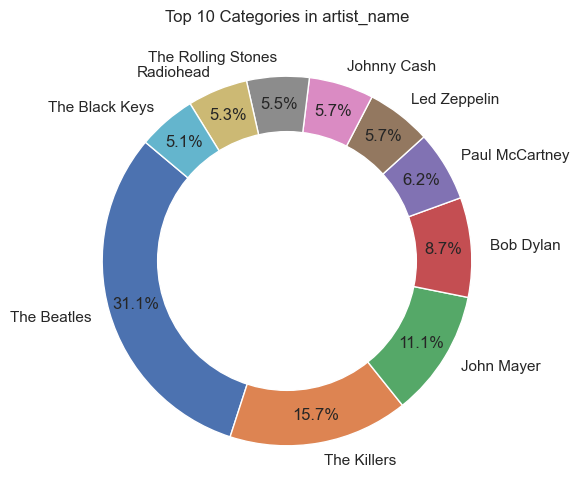

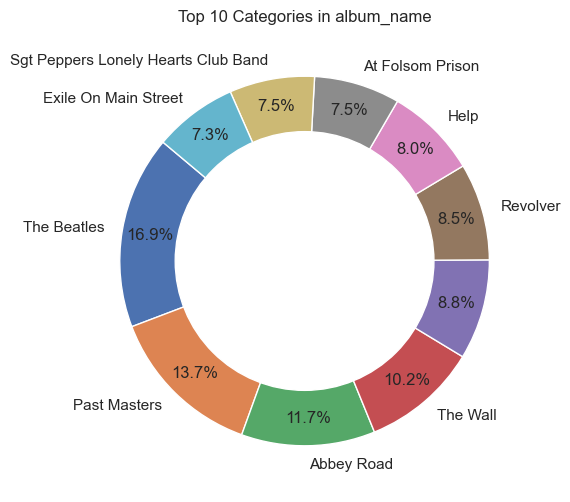

In [52]:
cat_cols = ['track_name', 'artist_name', 'album_name']  
create_donut_charts_for_3_cat_cols(df, cat_cols)

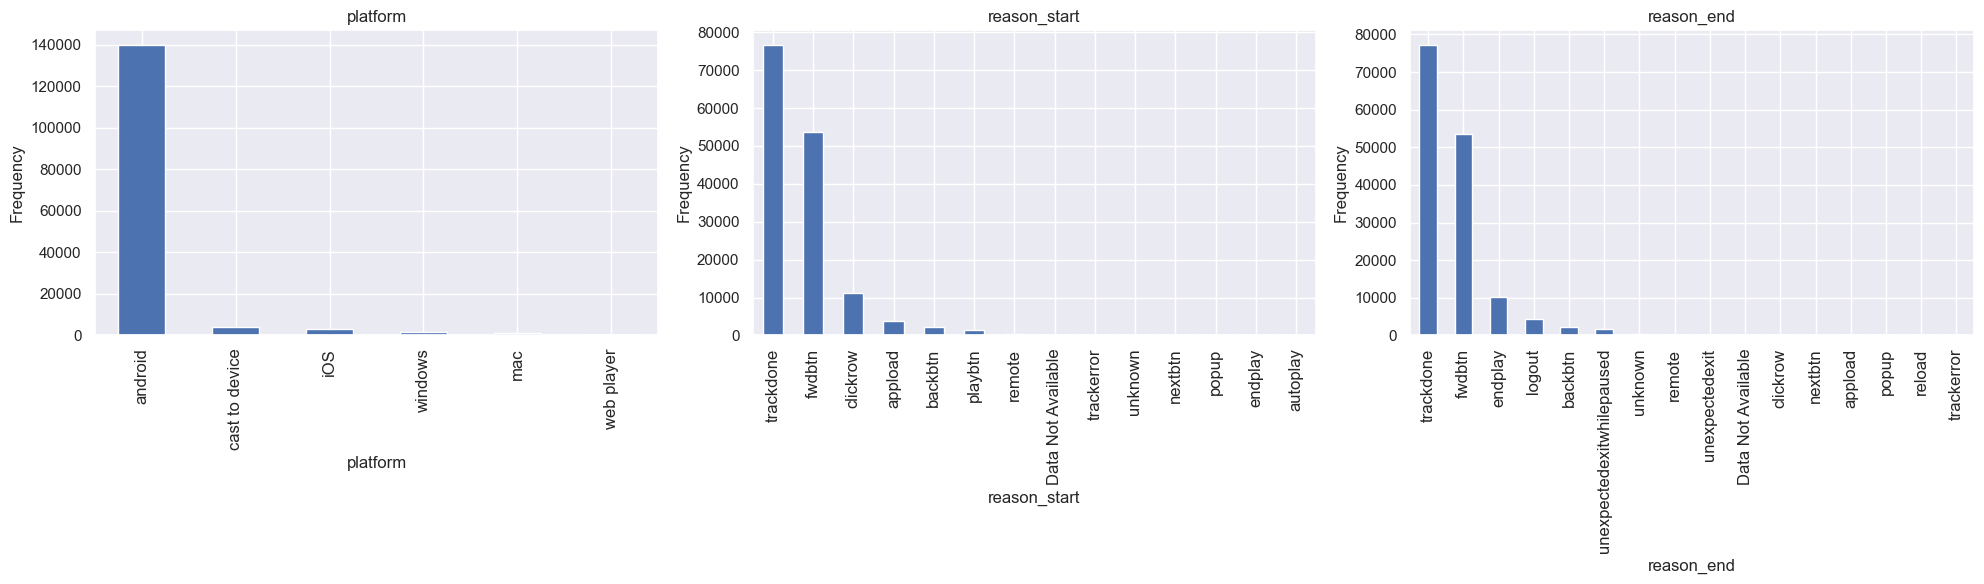

In [53]:
cat_cols = ['platform','reason_start','reason_end'] 
plot_histograms_cat_cols(df, cat_cols)

In [54]:
df_actual_top = select_tracks_by_reason_end(df)
df_actual_top.head()

,track_name,artist_name,album_name
17,Electric Feel,MGMT,Oracular Spectacular
23,7th Street,John Mayer,7th Street
24,Baby Youve Got the Nonsense,John Mayer,7th Street
25,Gravity Radio Edit,John Mayer,Gravity
26,Say,John Mayer,Say


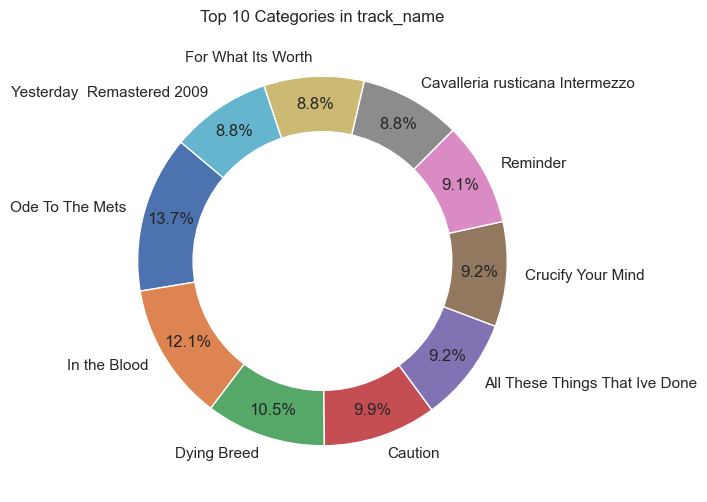

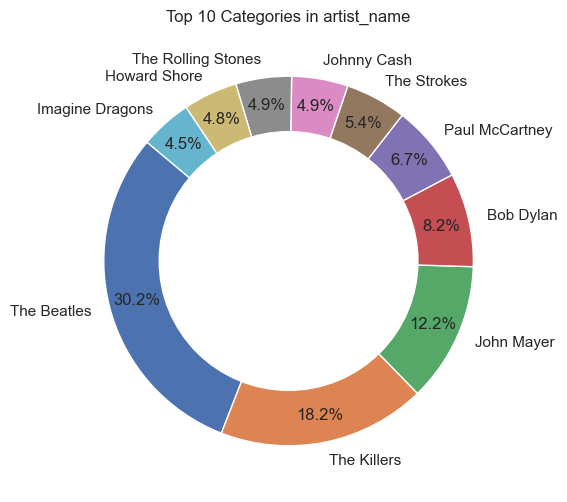

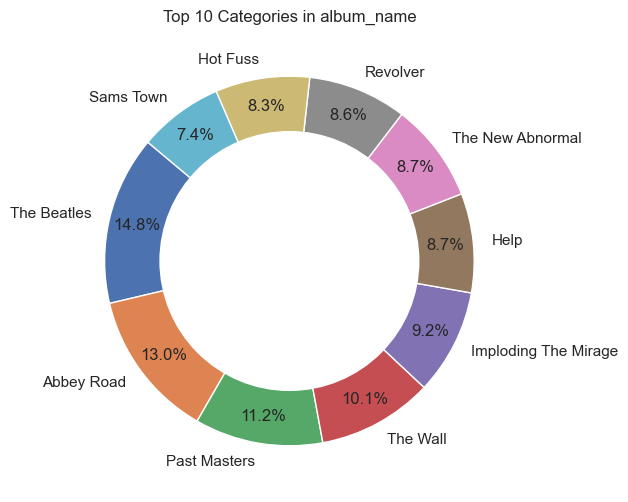

In [55]:
cat_cols = ['track_name', 'artist_name', 'album_name']  
create_donut_charts_for_3_cat_cols(df_actual_top, cat_cols)

In [56]:
print(" Top 10 based - overall", '\n', '~~~~~~~~~~~~~~~~~~~~~~')
columns = ['track_name', 'artist_name', 'album_name']
create_top10_tables(df, columns)

 Top 10 based - overall 
 ~~~~~~~~~~~~~~~~~~~~~~

Top 10 Categories in track_name:

   Rank                          Category  Count
0     1                   Ode To The Mets    207
1     2                      In the Blood    181
2     3                       Dying Breed    166
3     4                           Caution    164
4     5  19 Dias y 500 Noches  En Directo    148
5     6                For What Its Worth    146
6     7                Concerning Hobbits    142
7     7    All These Things That Ive Done    142
8     8    Come Together  Remastered 2009    137
9     9                         The Boxer    135
------------------------------

Top 10 Categories in artist_name:

   Rank            Category  Count
0     1         The Beatles  13621
1     2         The Killers   6878
2     3          John Mayer   4855
3     4           Bob Dylan   3814
4     5      Paul McCartney   2697
5     6        Led Zeppelin   2482
6     7         Johnny Cash   2478
7     8  The Rolling Stones   

In [57]:
print(" Top 10 based on track completed", '\n', '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
columns = ['track_name', 'artist_name', 'album_name']
create_top10_tables(df_actual_top, columns)

 Top 10 based on track completed 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Top 10 Categories in track_name:

   Rank                         Category  Count
0     1                  Ode To The Mets    166
1     2                     In the Blood    146
2     3                      Dying Breed    127
3     4                          Caution    120
4     5   All These Things That Ive Done    111
5     5                Crucify Your Mind    111
6     6                         Reminder    110
7     7  Cavalleria rusticana Intermezzo    107
8     8               For What Its Worth    106
9     8       Yesterday  Remastered 2009    106
------------------------------

Top 10 Categories in artist_name:

   Rank            Category  Count
0     1         The Beatles   6626
1     2         The Killers   3998
2     3          John Mayer   2682
3     4           Bob Dylan   1802
4     5      Paul McCartney   1480
5     6         The Strokes   1175
6     7         Johnny Cash   1080
7     8  The Rolling St